In [1]:
import nbimporter
import util
import cv2
import numpy as np
from hough_lines_acc import hough_lines_acc
from hough_peaks import hough_peaks
from hough_lines_draw import hough_lines_draw

Importing Jupyter notebook from util.ipynb
Importing Jupyter notebook from hough_lines_acc.ipynb
Importing Jupyter notebook from hough_peaks.ipynb
Importing Jupyter notebook from hough_lines_draw.ipynb


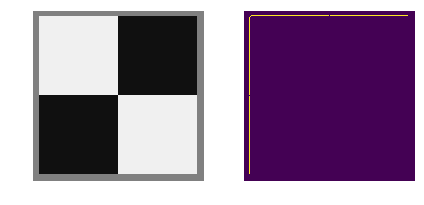

In [2]:
# 1

img = util.read_img('ps1-input0.png')
img_edges = cv2.Canny(img, 0, 0)
util.write_img('ps1-1-a-1.png', img_edges)

util.show_images_together(img, img_edges)

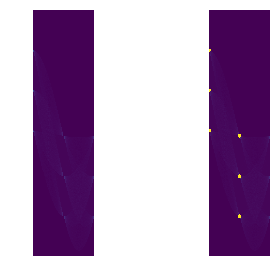

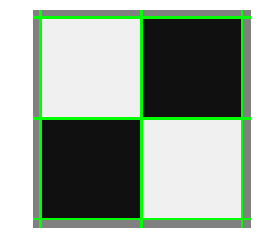

In [3]:
# 2

def highlight_hough_peaks(H, peaks):
    highlight_peaks = H.copy()
    for peak in peaks:
        row, col = peak
        cv2.circle(highlight_peaks, (col, row), 5, (255,255,255), -1)
    return highlight_peaks

H, rho, theta = hough_lines_acc(img_edges)
peaks = hough_peaks(H, 10);
highlight_peaks = highlight_hough_peaks(H, peaks)
util.write_img('ps1-2-a-1.png', H)
util.write_img('ps1-2-b-1.png', highlight_peaks)

util.show_images_together(H, highlight_peaks)

img_edge_colored = hough_lines_draw(img, 'ps1-2-c-1.png', peaks, rho, theta)
util.show_img(img_edge_colored)

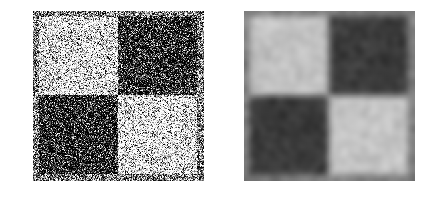

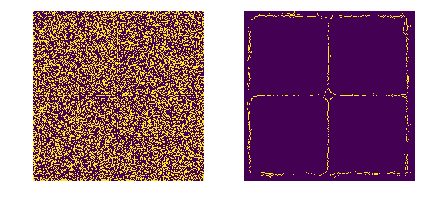

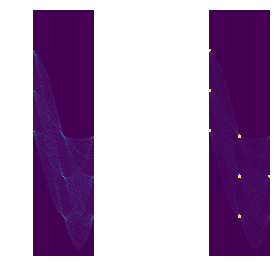

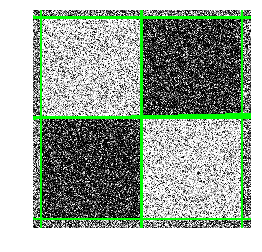

In [4]:
# 3

noisy_img = util.read_img('ps1-input0-noise.png')
smooth_img = cv2.GaussianBlur(noisy_img, (23, 23), 5)
util.write_img('ps1-3-a-1.png', smooth_img)

util.show_images_together(noisy_img, smooth_img)

noisy_edge_img = cv2.Canny(noisy_img, 20, 40)
smooth_edge_img = cv2.Canny(smooth_img, 20, 40)
util.write_img('ps1-3-b-1.png', noisy_edge_img)
util.write_img('ps1-3-b-2.png', smooth_edge_img)

util.show_images_together(noisy_edge_img, smooth_edge_img)

H, rho, theta = hough_lines_acc(smooth_edge_img)
peaks = hough_peaks(H, 10);
highlight_peaks = highlight_hough_peaks(H, peaks)
util.write_img('ps1-3-c-1.png', highlight_peaks)

util.show_images_together(H, highlight_peaks)
img_edge_colored = hough_lines_draw(noisy_img, 'ps1-3-c-2.png', peaks, rho, theta)
util.show_img(img_edge_colored)

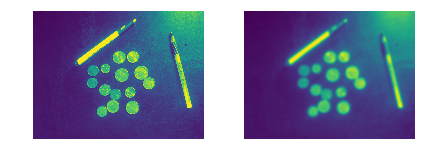

[[ 330   14]
 [1116  127]
 [1138  127]
 [ 357   15]
 [1164  135]
 [ 831   45]
 [ 882   46]]


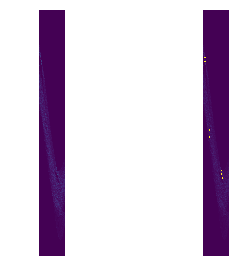

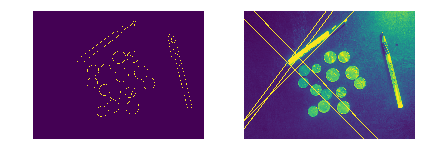

In [5]:
# 4

img = util.read_img_gray_mode('ps1-input1.png')
smooth_img = cv2.GaussianBlur(img, (25, 25), 0)
util.write_img('ps1-4-a-1.png', smooth_img)

util.show_images_together(img, smooth_img)
smooth_edge_img = cv2.Canny(smooth_img, 20, 40, 0.8)
util.write_img('ps1-4-b-1.png', smooth_edge_img)

H, rho, theta = hough_lines_acc(smooth_edge_img)
peaks = hough_peaks(H, 10, threshold=40, nhood_size=20);
print(peaks)
highlight_peaks = highlight_hough_peaks(H, peaks)
util.write_img('ps1-4-c-1.png', highlight_peaks)

util.show_images_together(H, highlight_peaks)
img_edge_colored = hough_lines_draw(img, 'ps1-4-c-2.png', peaks, rho, theta, (255,255,255))
util.show_images_together(smooth_edge_img, img_edge_colored)
